<a href="https://colab.research.google.com/github/miraclestar43/TensorFlow_test/blob/main/image_classification_cnn_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%pip install tensorflow numpy matplotlib

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [5]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

train_images = train_images / 127.5 - 1
test_images = test_images / 127.5 - 1

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


In [6]:
print('Number of images in the training dataset:', train_images.shape[0])
print('Number of images in the testing dataset:', test_images.shape[0])

Number of images in the training dataset: 50000
Number of images in the testing dataset: 10000


In [7]:
print(f"Shape of the images in the training dataset: {train_images[0].shape}")

Shape of the images in the training dataset: (32, 32, 3)


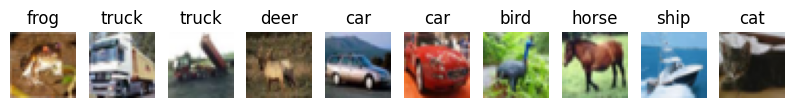

In [8]:
fig, axes = plt.subplots(1, 10, figsize=(10, 10))
for i in range(10):
    image = train_images[i]
    denormalized_image = (image + 1) / 2
    axes[i].imshow(denormalized_image)
    axes[i].set_title(classes[train_labels[i][0]])
    axes[i].axis('off')

In [9]:
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2), strides=(2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2), strides=(2, 2)),
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │       553,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 639,742 (2.44 MB)

 Trainable params: 639,742 (2.44 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.4312 - loss: 1.5624 - val_accuracy: 0.6199 - val_loss: 1.0640
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.6653 - loss: 0.9536 - val_accuracy: 0.6852 - val_loss: 0.9044
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7380 - loss: 0.7579 - val_accuracy: 0.7003 - val_loss: 0.8758
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7839 - loss: 0.6188 - val_accuracy: 0.7228 - val_loss: 0.8357
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8249 - loss: 0.5072 - val_accuracy: 0.7138 - val_loss: 0.8850
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8573 - loss: 0.4135 - val_accuracy: 0.7282 - val_loss: 0.8731
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8850 - loss: 0.3289 - val_accuracy: 0.7243 - val_loss: 0.9790
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9048 - loss: 0.269

In [12]:
def view_classification(image, probabilities):
    fig, (ax1, ax2) = plt.subplots(figsize=(6, 9), ncols=2)
    denormalized_image = (image + 1) / 2
    ax1.imshow(denormalized_image)
    ax1.axis('off')
    ax2.barh(np.arange(10), probabilities)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(classes)
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


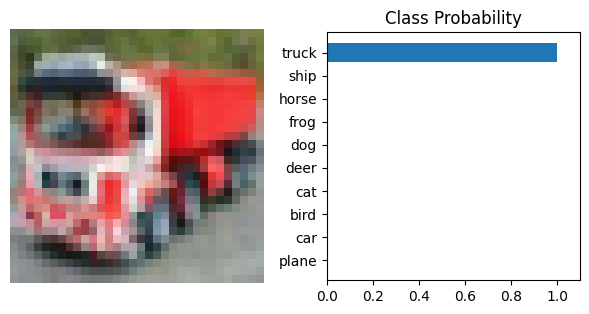

In [18]:
index = 666
image, label = test_images[index], test_labels[index]
probabilities = model.predict(image.reshape(1, 32, 32, 3))
view_classification(image,  probabilities[0])

In [14]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Accuracy of the neural network on the {test_images.shape[0]} test images: {test_accuracy * 100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7172 - loss: 1.2607
Accuracy of the neural network on the 10000 test images: 71.24%
